In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from wordcloud import WordCloud

import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

import nltk
from nltk.corpus import stopwords

from pprint import pprint

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

In [148]:
#Samaras Laptop
#song_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\DIE_DATEN\datensatz.csv')
#song_data = song_data[(song_data['Language'] == 'en')]
#song_data.to_csv("outData.csv", index=False)
#song_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\outData.csv')


#Anjas Laptop
# song_data = pd.read_csv('../Daten/train.csv')
# song_data = song_data[(song_data['Language'] == 'en')]
# song_data.to_csv("../Daten/outData.csv", index=False)
song_data = pd.read_csv('../Daten/outData.csv')

## Get a balanced sample of 5 songs per genre

In [149]:
num_genres = song_data.Genre.nunique()

In [150]:
song_data = song_data[["Genre", "Lyrics"]]
song_data = song_data.groupby('Genre').sample(5)
song_data

,Genre,Lyrics
247316,Country,"It's a gentle touch, but more than enough She ..."
237486,Country,I saw him picking up the pieces of his broken ...
249439,Country,"House is burning, you can't go home Got no rea..."
238869,Country,(I love you drops I miss you drops) (Hurry hom...
234648,Country,I'm going to that east pay road I'm going to t...
237301,Electronic,In the quiet of my room I gather up my thought...
233887,Electronic,"Hey gyal, how yuh pussy fat suh Yuh tightness ..."
229885,Electronic,\nhaters gonna hate\nhaters gonna hate\nbut i'...
247157,Electronic,"Euch wurde ein, wundervolles Geschenk gebracht..."
241449,Electronic,I love it I love it I love it I love it And li...


## Remove punctuation/lower casing

In [151]:
song_data_processed = song_data.copy()
song_data_processed['Lyrics'] = song_data_processed['Lyrics'].map(lambda x: re.sub('[,\.!?]', '', x))
song_data_processed['Lyrics'] = song_data_processed['Lyrics'].map(lambda x: x.lower())

## Remove stopwords and Tokenize

In [152]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anjan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [153]:
stop_words = stopwords.words('english')

In [154]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield simple_preprocess(str(sentence), deacc=True)

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

#Apply tokenization and remove stopwords
song_data_processed['Tokens'] = remove_stopwords(sent_to_words(song_data_processed['Lyrics']))
song_data_processed

,Genre,Lyrics,Tokens
247316,Country,it's a gentle touch but more than enough she c...,"[gentle, touch, enough, stop, ole, world, spin..."
237486,Country,i saw him picking up the pieces of his broken ...,"[saw, picking, pieces, broken, heart, stopped,..."
249439,Country,house is burning you can't go home got no reas...,"[house, burning, go, home, got, reason, alone,..."
238869,Country,(i love you drops i miss you drops) (hurry hom...,"[love, drops, miss, drops, hurry, home, drops,..."
234648,Country,i'm going to that east pay road i'm going to t...,"[going, east, pay, road, going, east, pay, roa..."
237301,Electronic,in the quiet of my room i gather up my thought...,"[quiet, room, gather, thoughts, questions, cou..."
233887,Electronic,hey gyal how yuh pussy fat suh yuh tightness b...,"[hey, gyal, yuh, pussy, fat, suh, yuh, tightne..."
229885,Electronic,\nhaters gonna hate\nhaters gonna hate\nbut i'...,"[haters, gonna, hate, haters, gonna, hate, fuc..."
247157,Electronic,euch wurde ein wundervolles geschenk gebracht ...,"[euch, wurde, ein, wundervolles, geschenk, geb..."
241449,Electronic,i love it i love it i love it i love it and li...,"[love, love, love, love, live, live, let, nobo..."


In [155]:
# Create a dictionary and a corpus for each song
corpora = []
dictionaries = []
lda_models = []
topics = []
dominant_topics = []

num_topics = num_genres  # Change this to the desired number of topics

for i, tokens in enumerate(song_data_processed['Tokens']):
    # Create Dictionary
    id2word = gensim.corpora.Dictionary([tokens])

    # Create Corpus
    corpus = [id2word.doc2bow(tokens)]

    corpora.append(corpus)
    dictionaries.append(id2word)

    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
    lda_models.append(lda_model)

    # Get the most dominant topic for each song
    song_topics = lda_model.get_document_topics(corpus[0], minimum_probability=0.0)
    dominant_topic = max(song_topics, key=lambda x: x[1])[0]

    song_topics = list(map(lambda x: x[1], song_topics))
    
    dominant_topics.append(dominant_topic)
    topics.append(song_topics)

# Add the 'topics_words' column to the DataFrame
song_data_processed['Topics'] = topics
song_data_processed['Dominant_Topic'] = dominant_topics
song_data_processed

,Genre,Lyrics,Tokens,Topics,Dominant_Topic
247316,Country,it's a gentle touch but more than enough she c...,"[gentle, touch, enough, stop, ole, world, spin...","[0.0013700471, 0.0013698966, 0.10664647, 0.001...",9
237486,Country,i saw him picking up the pieces of his broken ...,"[saw, picking, pieces, broken, heart, stopped,...","[0.0016666913, 0.0016667048, 0.001666718, 0.00...",7
249439,Country,house is burning you can't go home got no reas...,"[house, burning, go, home, got, reason, alone,...","[0.00063304376, 0.00063296966, 0.0006331924, 0...",8
238869,Country,(i love you drops i miss you drops) (hurry hom...,"[love, drops, miss, drops, hurry, home, drops,...","[0.0016666804, 0.0016666804, 0.0016666804, 0.0...",4
234648,Country,i'm going to that east pay road i'm going to t...,"[going, east, pay, road, going, east, pay, roa...","[0.0012658285, 0.0012658285, 0.0012660782, 0.0...",8
237301,Electronic,in the quiet of my room i gather up my thought...,"[quiet, room, gather, thoughts, questions, cou...","[0.0003391425, 0.0003391394, 0.0003390922, 0.0...",5
233887,Electronic,hey gyal how yuh pussy fat suh yuh tightness b...,"[hey, gyal, yuh, pussy, fat, suh, yuh, tightne...","[0.00031853167, 0.00031847748, 0.0003185135, 0...",4
229885,Electronic,\nhaters gonna hate\nhaters gonna hate\nbut i'...,"[haters, gonna, hate, haters, gonna, hate, fuc...","[0.000877242, 0.00087722874, 0.0008772332, 0.0...",8
247157,Electronic,euch wurde ein wundervolles geschenk gebracht ...,"[euch, wurde, ein, wundervolles, geschenk, geb...","[0.00063303096, 0.00063298974, 0.0006331157, 0...",7
241449,Electronic,i love it i love it i love it i love it and li...,"[love, love, love, love, live, live, let, nobo...","[0.0008403384, 0.99243665, 0.0008403394, 0.000...",1


### Explore Results

#### Crosstab

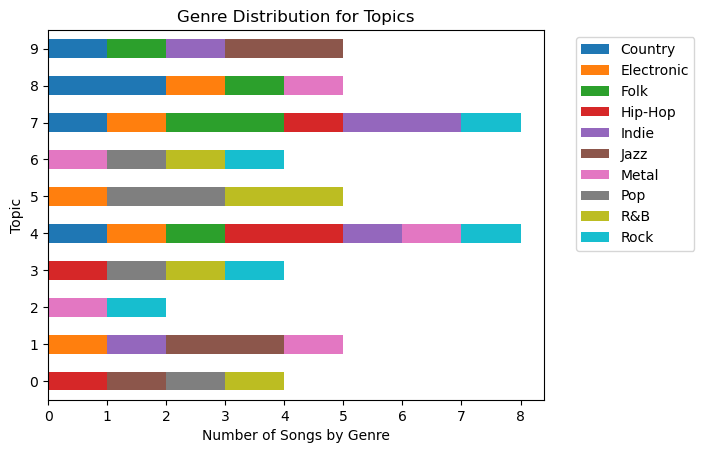

In [156]:
# Create a crosstab
crosstab = pd.crosstab(song_data_processed['Dominant_Topic'], song_data_processed['Genre'])

# Plot the crosstab
crosstab.plot(kind='barh', stacked=True).legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Number of Songs by Genre')
plt.ylabel('Topic')
plt.title('Genre Distribution for Topics')
plt.show()

#### Clustering (PCA) (clustering LDA Results)

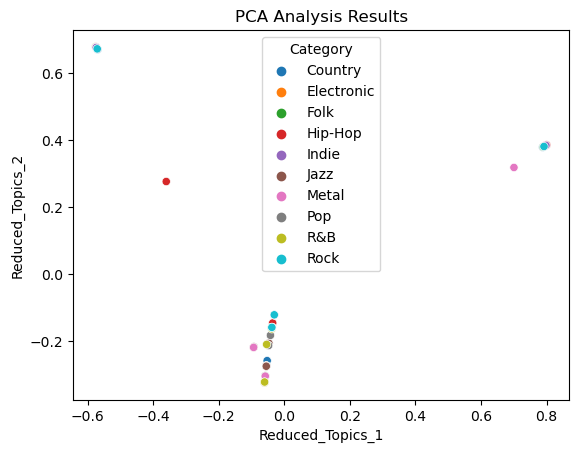

In [157]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(song_data_processed["Topics"].to_list())
#song_data_processed["Reduced_Topics"] = reduced.tolist()
song_data_processed[['Reduced_Topics_1', 'Reduced_Topics_2']] = reduced
#Scatter Plot
sns.scatterplot(x='Reduced_Topics_1', y='Reduced_Topics_2', hue='Genre', data=song_data_processed)
plt.title('PCA Analysis Results')
plt.legend(title='Category')
plt.show()